# Import data

The import code in this section is specific to the CSV automatically generated for each collective dialouge on remesh. To use data from other sources, import code will need written which transforms the data into the following format:


*   A list named *qs* where each list entry is a dataframe with data for a quesiton/prompt
*   Each data frame for a quesiton/prompt is formatted such that rows correspond to *responses* and there are the following columns: *Question*, *Question Type*, *Responses* , *Segment 1* , *Segment 2*, ... , *Segmnet N*
*   The values in the columns for each segment are the fraction of participants in that segment which agree with the response in that row.

It is also helpful to have the code output the list of questions and segments and their IDs so they can be referenced by ID for use in later sections of this notebook.



In [1]:
from google.colab import files
import pandas as pd
import csv
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data from file
uploaded = files.upload()
filename = next(iter(uploaded))
with open(filename,'r') as file:
  csvreader = csv.reader(file)
  r = 1
  data = []
  qdata = []
  for row in csvreader:
    if r>9:
      if row == []:
        data.append(qdata)
        qdata = []
      else:
        qdata.append(row)
    r=r+1
  data.append(qdata)

#handle blank row
data = data[1:]

#percent string to float
def p2f(x):
  try:
    if x==' - ':
      return float("nan")
    else:
      return float(x.strip('%'))/100
  except:
    return x

#make numeric
nq = len(data)
qs = []
meta = [["question type","question text"]]
for i in range(0,nq):
  d = data[i]
  m = [d[1][1],d[1][2]]
  meta.append(m)
  if d[1][1] == 'Poll Single Select':
    for r in range(1,len(d)):
      for c in range(4,len(d[0])):
        d[r][c] = p2f(d[r][c])
  if d[1][1] == 'Ask Opinion':
    for r in range(1,len(d)):
      for c in range(6,len(d[0])-3):
        d[r][c] = p2f(d[r][c])
  df = pd.DataFrame(d[1:],columns = d[0])
  qs.append(df)
qmeta = pd.DataFrame(meta[1:],columns = meta[0])

print("Questions:")
qmeta

Saving CD1_pretest_C_med.csv to CD1_pretest_C_med.csv
Questions:


,question type,question text
0,Poll Single Select,What is your age?
1,Poll Single Select,What is your ethnicity?
2,Poll Single Select,What gender do you identify with?
3,Poll Single Select,What political party do you most identify with?
4,Poll Single Select,What is your highest level of education?
5,Poll Single Select,How much have you heard or read about AI (Arti...
6,Poll Single Select,How often do you use an AI assistant such as C...
7,Poll Single Select,"Overall, do you think AI will be _____?"
8,Poll Single Select,On the whole when thinking about artificial in...
9,Ask Opinion,Can you share a positive experience involving ...


In [3]:
#extract segments
d=data[0]
segments = []
if d[1][1] == 'Poll Single Select':
  r=0
  for c in range(4,len(d[0])):
    segments.append(d[r][c])
if d[1][1] == 'Ask Opinion':
  r=0
  for c in range(5,len(d[0])-3):
    segments.append(d[r][c])
print("Segments")
pd.DataFrame(segments)

Segments


,0
0,All(57)
1,O1: 18-24 (6)
2,O1: 25-34 (16)
3,O1: 33-44 (15)
4,O1: 45-54 (8)
5,O1: 55+ (12)
6,O2: Asian (2)
7,O2: Black (9)
8,O2: Hispanic (5)
9,O2: White (36)


# Visualize poll data

This section enables a simple visualization of poll data cut by segments.

In [4]:
import matplotlib.pyplot as plt
plt.close("all")

In [5]:
#plot poll data
def plot_poll(df,segs):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[4+segs[i]])
  dfplt = df[segs_incl]
  dfplt = dfplt.set_index('Responses')
  dfplt.plot.barh()
  return dfplt

How often do you use an AI assistant such as ChatGPT, Claud, and Bard?


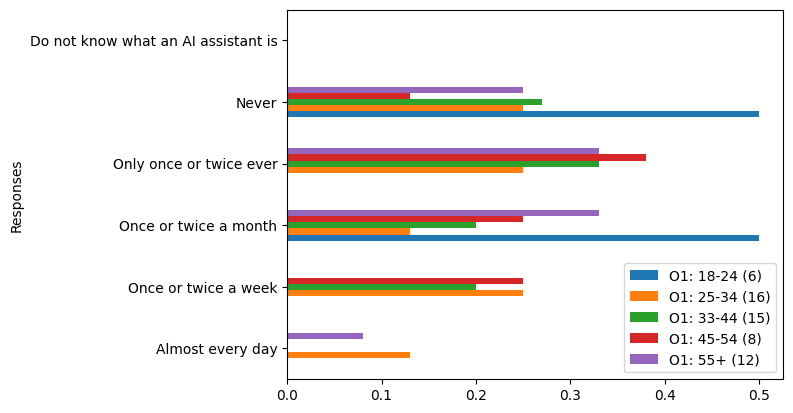

In [6]:
#choose question and segments
qid = 6
segs = [1,2,3,4,5]

#plot
d =plot_poll(qs[qid],segs)

#Visusalize collective response question data

Here we create a simple visualization of the results of a **collective response** question (aka "ask opinion" on Remesh) where users respond with natural language and then vote on the responses submitted by others. The visualization is generated for a selected *question* and *set of segments*. In the visualization each row corresponds to a response, columns correspond to the selected set of segments, and values correspond to the fraction of each segment which  agrees* with each response.

**this agreement fraction is computed on Remesh using [elicitation inference](https://openreview.net/pdf?id=tkxnRPkb_H). We sample around 10-30 votes per person, then infer the rest. Accuracy of individual vote inferences is 75-80%, and the aggregated agreement fraction values for each segment have a 1 stdv confidence range of around +/- 1-3%.*

In [7]:
#plot ask opinion data
def make_pretty(styler):
  styler.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")
  styler.format(precision=2)
  return styler

#generate the table of data
def table_ask(df,segs,n):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[6+segs[i]])
  dfplt = df[segs_incl]
  #dfplt = dfplt.set_index('Responses')
  return dfplt.iloc[:n].style.pipe(make_pretty)



In [8]:
#choose question and segments
qid = 14
segs = [1,2,3,4,5,12,13,16,17,18]

#plot
table_ask(qs[qid],segs,30)

What is one specific policy you think an AI assistant should follow when responding to a medical advice request? 
Use the same format as above: "If [situation] then [what AI should do]."


,Responses,O1: 18-24 (6),O1: 25-34 (15),O1: 33-44 (13),O1: 45-54 (7),O1: 55+ (10),O3: Male (19),O3: Female (30),O4: Democrat (26),O4: Republican (7),O4: Independant (13)
0,"If someone’s life is at stake, the AI assistant should direct them to emergency services.",0.50,0.73,0.69,0.71,0.70,0.58,0.73,0.69,0.71,0.62
1,If someone is serious ill then the advise should be to get medical help right away,0.50,0.67,0.77,0.57,0.80,0.68,0.67,0.69,0.71,0.62
2,"If it’s a life threatening situation, then AI should recommend them to go see a doctor and list hospitals and places that can go that is covered by their insurance or situation they have.",0.50,0.67,0.62,0.71,0.90,0.53,0.77,0.69,0.71,0.54
3,"If someone asks for any sort of medical advice no matter how serious or benign, the AI should let the inquirer know it’s limitations and that their best option would always be to check with an actual doctor.",0.83,0.60,0.62,0.86,0.60,0.58,0.73,0.62,0.71,0.69
4,A policy that should be in place is when a person is experiencing potential life or death situation the AI should promptly tell them to dial 911 or seek medical attention right away.,0.50,0.67,0.62,0.71,0.80,0.58,0.70,0.69,0.57,0.62
5,That if the question relates to any high risk medical advice or situation then the AI should recommend seeking out a medical professional.,0.50,0.67,0.62,0.86,0.70,0.47,0.77,0.73,0.57,0.54
6,"If the person is suicidal, then the AI should provide steps for contacting a live crisis center worker.",0.67,0.60,0.62,0.57,0.80,0.58,0.67,0.69,0.57,0.54
7,"If someone's life is at stake, then the AI should advise calling 911 or going to the ER",0.50,0.67,0.62,0.71,0.70,0.53,0.70,0.65,0.57,0.62
8,If someone’s life is at stake then the AI should refer the person to call 911 or contact a medical professional,0.50,0.67,0.62,0.57,0.70,0.53,0.67,0.62,0.57,0.62
9,"If your life is in danger, contact 911 or a medical professional right away.",0.33,0.67,0.69,0.57,0.70,0.68,0.57,0.58,0.71,0.62


#Generate bridging and polarization metrics across a specified set of segments

Here we compute simple versions of both bridging and polarization metrics for each response.

**The bridging metric** is meant to capture the degree to which there is agreement for a response across ALL specified population segments; even those which typically disagree. To capture this we use the segment-level analouge of a Max-Min social wellfare function. If a_ij is the fraction of the j^th segment which agrees with i^th response, then we compute the bridging metric for that response as b_i = MIN(a_i1,a_i2,...,a_iN)

**The polarization metric** is meant to capture the degree to which there is polariation between specified segments about a response. To capture this we compute the difference in agreement fraction for the segments which most agree with the response and least agree with the response. ie p_i = MAX(a_i1,a_i2,...,a_iN) - MIN(a_i1,a_i2,...,a_iN)

*We note that both of these are simplistic metrics and that more sophisticated versions might be prefered. This is a potential vector of improvement for this prototype*

In [9]:
#compute min-based bridging metric
def min_bridge(row,segs_incl,col):
  b = 1
  for s in range(0,len(segs_incl)):
    b_ = row[segs_incl[s]]
    b = min(b,b_)
  return b

#compute max-min polarization metric
def polarization(row,segs_incl,col):
  mx = 0
  mn = 1
  for s in range(0,len(segs_incl)):
    b_ = row[segs_incl[s]]
    mx = max(mx,b_)
    mn = min(mn,b_)
  return mx-mn

#generate dataframe which includes bridging and polarization metrics
def bridging_ask(df,segs):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[6+segs[i]])
  dfplt = df[segs_incl]
  dfplt["bridge"] = df.apply (lambda row: min_bridge(row,segs_incl[1:],df.columns), axis=1)
  dfplt["polarization"] = df.apply (lambda row: polarization(row,segs_incl[1:],df.columns), axis=1)
  return dfplt.sort_values(by=["bridge"],ascending=False)

In [13]:
#choose question and segments
qid = 14
segs = [1,2,3,4,5,12,13,16,17,18]

#get table
ba = bridging_ask(qs[qid],segs).iloc[:30]
ba.style.pipe(make_pretty)

What is one specific policy you think an AI assistant should follow when responding to a medical advice request? 
Use the same format as above: "If [situation] then [what AI should do]."


,Responses,O1: 18-24 (6),O1: 25-34 (15),O1: 33-44 (13),O1: 45-54 (7),O1: 55+ (10),O3: Male (19),O3: Female (30),O4: Democrat (26),O4: Republican (7),O4: Independant (13),bridge,polarization
3,"If someone asks for any sort of medical advice no matter how serious or benign, the AI should let the inquirer know it’s limitations and that their best option would always be to check with an actual doctor.",0.83,0.60,0.62,0.86,0.60,0.58,0.73,0.62,0.71,0.69,0.58,0.28
6,"If the person is suicidal, then the AI should provide steps for contacting a live crisis center worker.",0.67,0.60,0.62,0.57,0.80,0.58,0.67,0.69,0.57,0.54,0.54,0.26
0,"If someone’s life is at stake, the AI assistant should direct them to emergency services.",0.50,0.73,0.69,0.71,0.70,0.58,0.73,0.69,0.71,0.62,0.50,0.23
12,If it is a life threatening situation then the AI should call or refer to 911 or a nearby hospital.,0.50,0.67,0.62,0.57,0.70,0.53,0.67,0.62,0.57,0.62,0.50,0.20
1,If someone is serious ill then the advise should be to get medical help right away,0.50,0.67,0.77,0.57,0.80,0.68,0.67,0.69,0.71,0.62,0.50,0.30
7,"If someone's life is at stake, then the AI should advise calling 911 or going to the ER",0.50,0.67,0.62,0.71,0.70,0.53,0.70,0.65,0.57,0.62,0.50,0.21
8,If someone’s life is at stake then the AI should refer the person to call 911 or contact a medical professional,0.50,0.67,0.62,0.57,0.70,0.53,0.67,0.62,0.57,0.62,0.50,0.20
4,A policy that should be in place is when a person is experiencing potential life or death situation the AI should promptly tell them to dial 911 or seek medical attention right away.,0.50,0.67,0.62,0.71,0.80,0.58,0.70,0.69,0.57,0.62,0.50,0.30
2,"If it’s a life threatening situation, then AI should recommend them to go see a doctor and list hospitals and places that can go that is covered by their insurance or situation they have.",0.50,0.67,0.62,0.71,0.90,0.53,0.77,0.69,0.71,0.54,0.50,0.40
5,That if the question relates to any high risk medical advice or situation then the AI should recommend seeking out a medical professional.,0.50,0.67,0.62,0.86,0.70,0.47,0.77,0.73,0.57,0.54,0.47,0.39


#Select bridging responses

Here we select a set of responses whose bridging agreement is above a specified threshold. For now, we select the threshold such that the number of responses above it is small enough to fit within 8k the context window of the GPT-4 version we have access to so they can be used in the next step.

To highlight what this selection of responses equates to, we plot all responses as a function of their **overall agreement** (x-axis) and **polarization** (y-axis) and highlight those above the specific bridging threshold. This highlights the fact that selecting the responses with the highest bridging agreement generally equates to selecting responses with high overall agreement and low polarization; where the degree of polarization permissible is lower for responses with lower overall agreement.

In [14]:
#plot agreement vs polairation and highlight bridging response over threshold
def plot_agreement_polarization_with_bridging(df,segs,thresh):
  bdf = bridging_ask(df,segs)
  bridge_true = bdf.loc[bdf['bridge']>thresh]
  bridge_false = bdf.loc[bdf['bridge']<=thresh]
  plt.figure(figsize=(7,7))
  plts=plt.scatter(bdf[bdf.columns[2]],bdf["polarization"],c=bdf["bridge"],cmap="RdYlGn",alpha=0.3,edgecolors='none',s=80, label='all')
  plt.legend(*plts.legend_elements(),bbox_to_anchor=(1.0, 1.0),loc="upper left", title="Bridging Agreement",frameon=False)
  plt.scatter(bridge_true[bridge_true.columns[2]],bridge_true["polarization"],edgecolors="black",s=90,facecolors='none', label='bridge>thresh')
  plt.xlabel("Overall Agreement")
  plt.ylabel("Polarization")

  return plt.show()

def get_bridging_responses(df,segs,thresh):
  bdf = bridging_ask(df,segs)
  return bdf.loc[bdf['bridge']>thresh]

What is one specific policy you think an AI assistant should follow when responding to a medical advice request? 
Use the same format as above: "If [situation] then [what AI should do]."


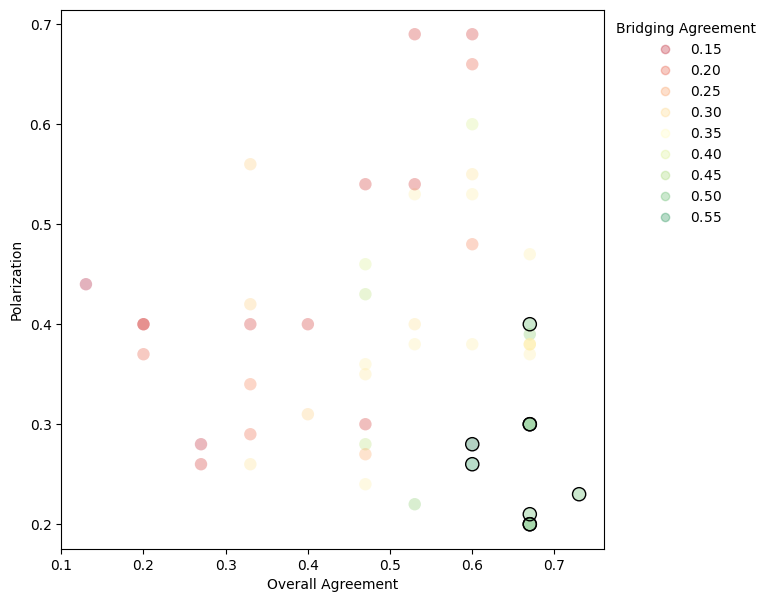

What is one specific policy you think an AI assistant should follow when responding to a medical advice request? 
Use the same format as above: "If [situation] then [what AI should do]."


,Responses,O1: 18-24 (6),O1: 25-34 (15),O1: 33-44 (13),O1: 45-54 (7),O1: 55+ (10),O3: Male (19),O3: Female (30),O4: Democrat (26),O4: Republican (7),O4: Independant (13),bridge,polarization
3,"If someone asks for any sort of medical advice no matter how serious or benign, the AI should let the inquirer know it’s limitations and that their best option would always be to check with an actual doctor.",0.83,0.60,0.62,0.86,0.60,0.58,0.73,0.62,0.71,0.69,0.58,0.28
6,"If the person is suicidal, then the AI should provide steps for contacting a live crisis center worker.",0.67,0.60,0.62,0.57,0.80,0.58,0.67,0.69,0.57,0.54,0.54,0.26
0,"If someone’s life is at stake, the AI assistant should direct them to emergency services.",0.50,0.73,0.69,0.71,0.70,0.58,0.73,0.69,0.71,0.62,0.50,0.23
12,If it is a life threatening situation then the AI should call or refer to 911 or a nearby hospital.,0.50,0.67,0.62,0.57,0.70,0.53,0.67,0.62,0.57,0.62,0.50,0.20
1,If someone is serious ill then the advise should be to get medical help right away,0.50,0.67,0.77,0.57,0.80,0.68,0.67,0.69,0.71,0.62,0.50,0.30
7,"If someone's life is at stake, then the AI should advise calling 911 or going to the ER",0.50,0.67,0.62,0.71,0.70,0.53,0.70,0.65,0.57,0.62,0.50,0.21
8,If someone’s life is at stake then the AI should refer the person to call 911 or contact a medical professional,0.50,0.67,0.62,0.57,0.70,0.53,0.67,0.62,0.57,0.62,0.50,0.20
4,A policy that should be in place is when a person is experiencing potential life or death situation the AI should promptly tell them to dial 911 or seek medical attention right away.,0.50,0.67,0.62,0.71,0.80,0.58,0.70,0.69,0.57,0.62,0.50,0.30
2,"If it’s a life threatening situation, then AI should recommend them to go see a doctor and list hospitals and places that can go that is covered by their insurance or situation they have.",0.50,0.67,0.62,0.71,0.90,0.53,0.77,0.69,0.71,0.54,0.50,0.40


In [15]:
#choose question and segments
qid = 14
segs = [1,2,3,4,5,12,13,16,17,18]
thresh = .49

#plot
plot_agreement_polarization_with_bridging(qs[qid],segs,thresh)

#table
ba = get_bridging_responses(qs[qid],segs,thresh)
ba.style.pipe(make_pretty)

# Distill unique ideas from bridging responses and generate policies based on those ideas

Here we use an LLM (GPT-4) to do two tasks:

1.   Generate a summary of the unique ideas found within the bridging responses.
2.   Genereate policies based on the unique ideas generated in step 1.


Here we note that the size of the context window of LLM we use limits the number of bridging responses which can be (easily) included in the summary tasks. Right now we use this limit to manually determine the briging agreement threshold we use in the previous section. If needed, it is likely possible to escape this limit by taking an iterative, hierarchical approch to summarization, ie by chunking briding responses into sets that fit in the context window limit, generating summaries for each chunk, then generating a summary of the summaries. This is vector for improvement of this prototype.

In [16]:
!pip install langchain
!pip install openai
!pip install -U sentence-transformers
import os
os.environ["OPENAI_API_KEY"] = "your_api_key"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.9 MB/s eta 0:00:00
   

In [25]:
#build the lang chain to do summary -> policies

#from langchain.llms import ChatOpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SequentialChain

#load LLM
llm = ChatOpenAI(temperature=0.5,model_name='gpt-4')

#summarization prompt
summaryPrompt = PromptTemplate(
    input_variables=["question","responses"],
    template="""
    Participants in a research study were asked '{question}'.

    These are their responses:
    {responses}

    Summarize all of the unique ideas within these responses into very short bullet points.
    """
)
#add to chain
summaryChain = LLMChain(llm=llm, prompt=summaryPrompt,output_key="summary")

#policy prompt
policyPrompt = PromptTemplate(
    input_variables=["question","summary","responses"],
    template="""
    Participants in a research study were asked '{question}'.

    These are their responses:
    {responses}

    The main ideas from these responses are:
    {summary}

    A policy is a course or principle of action.

    Write a few clear and actionable policies in the form of bullet points based on these ideas. Avoid redundant policies.

    for example:

    - Maintain the highest epistemic standards: Ensure your information is accurate, well-sourced, and contextually appropriate. This will help build a foundation of trust and credibility.
    - Facilitate productive engagement: Strive to assist the user in understanding and engaging with political topics in a meaningful way, rather than persuading them towards a particular viewpoint.

    """
)
#add to chain
policyChain = LLMChain(llm=llm, prompt=policyPrompt,output_key="policies")

#build the chain
mainChain = SequentialChain(
    chains=[summaryChain, policyChain],
    input_variables=["question", "responses"],
    # Here we return multiple variables
    output_variables=["summary","policies"],
    verbose=False)

#function to run the whole pipeline
def gen_policies(qs,qid,segs,thresh):
  #build string of responses
  ba = get_bridging_responses(qs[qid],segs,thresh)
  responses_str = ''
  for ind in ba.index:
    rsp = ba["Responses"][ind]
    responses_str+=rsp
    responses_str+="\n "

  #get quesiton text
  df = qs[qid]
  question_str = df["Question"][1]

  #run the langchain on the data
  out = mainChain({
      "question":question_str,
      "responses":responses_str
  })
  return out

In [18]:
#choose question and segments
qid = 14
segs = [1,2,3,4,5,12,13,16,17,18]
thresh = .50

#generate summary and policies
out = gen_policies(qs,qid,segs,thresh)

print("")
print("Summary:")
print(out["summary"])
print("")
print("Policies:")
print(out["policies"])

What is one specific policy you think an AI assistant should follow when responding to a medical advice request? 
Use the same format as above: "If [situation] then [what AI should do]."

Summary:
- AI should clarify its limitations on providing medical advice and recommend consulting a doctor.
- In cases of suicidal tendencies, AI should provide contact information for a live crisis center.

Policies:
- Acknowledge Limitations: The AI should clearly state that it is not a replacement for professional medical advice and always recommend consulting a doctor for medical concerns.
- Prioritize Mental Health Emergencies: If a user indicates suicidal tendencies, the AI should immediately provide contact information for a live crisis center.
- Ensure Accuracy: The AI should only provide information that is accurate, well-sourced, and contextually appropriate to maintain credibility.
- Promote User Understanding: The AI should aim to help users understand their medical concerns, rather than m

# Estimate how well each policy is justified by the bridging responses

Here we aim to estimate the degree to which the bridging responses serve as evidece to support each policy. Our simple approach to this is to identify the bridging response which best supports each policy, then use how well that response supports the policy as a proxy for the overall strenght of evidence.

As a proxy for how well each response justifies each policy we use *semantic similarity*; ie. the cosine similarity between their corresponding embeddings. We note that a better way to quantify this might be to compute the degree of *entailment* between them, and we suspect GPT-4 may be used to compute entailment. This reprsents a potential vector of improvement for this prototype.


In [19]:
#get embeddings for policies and bridging_responses
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

In [34]:
#function to run full pipeline to generate policies with evidence e2e

import numpy as np

#function to get embeddings
def get_embedding(text_list,model):
  embeddings = [model.encode(text) for text in text_list]
  return np.squeeze(embeddings)

def get_policies_with_evidence(qs,qid,segs,thresh,show_sim_matrix=False):
  #policy generation based on bridging responses
  out = gen_policies(qs,qid,segs,thresh)

  #output summary and policies
  print("")
  print("Summary:")
  print(out["summary"])
  print("")
  print("Policies:")
  print(out["policies"])
  print("")

  #extract policies
  policies = list(map(lambda x: x[2:],out["policies"].splitlines()))

  #extract bridging responses
  import math
  bridging_responses = []
  bridging_responses_with_bridging_support = []
  bridging_support = []
  ba = get_bridging_responses(qs[qid],segs,thresh)
  responses_str = ''
  for ind in ba.index:
    rsp = ba["Responses"][ind]
    bridging_responses.append(rsp)
    bridging_support.append(ba["bridge"][ind])
    rsp += " [bridging support="
    b = math.floor(ba["bridge"][ind]*100)
    rsp +=str(b)
    rsp +="%]"
    bridging_responses_with_bridging_support.append(rsp)

  #get embeddings for policies and bridging responses
  ep = get_embedding(policies,model)
  er = get_embedding(bridging_responses,model)

  #compute similarity matrix between policies and responses
  sim = cosine_similarity(ep,er)

  if show_sim_matrix:
    #visualize simialrlity matrix between policies and bridging responses
    fig, ax = plt.subplots()
    im = ax.imshow(sim,cmap="RdYlGn")
    xt = ax.set_xticks(np.arange(len(bridging_responses)), labels=bridging_responses,fontsize=8)
    yt = ax.set_yticks(np.arange(len(policies)), labels=policies,fontsize=8)
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.tick_params(top=True, bottom=False,labeltop=True, labelbottom=False)
    cbar.ax.set_ylabel("CosSim", rotation=-90, va="bottom")
    fig.tight_layout()
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",rotation_mode="anchor")
    plt.show()

  #compute best supporting response for each policy
  supporting_response_index = [sim[j].argmax() for j in range(0,len(policies))]
  supporting_responses = [bridging_responses_with_bridging_support[supporting_response_index[j]] for j in range(0,len(policies))]
  evidence_strength = [sim[j].max() for j in range(0,len(policies))]
  #justification = [sim[j].max()*bridging_support[j] for j in range(0,len(policies))]

  #create data frame with policies and suppporting responses
  pd.set_option('display.max_colwidth', 0)
  psrdf = pd.DataFrame()
  psrdf["Policy"] = policies
  psrdf["Evidence strength"] = evidence_strength
  psrdf["Evidence Response [briging support]"] = supporting_responses
  #psrdf["Bridging support"] = bridging_support
  #psrdf["Justification"] = justification
  psrdf=psrdf.sort_values(by=["Justification"],ascending=False)
  psrdf_formated = psrdf.style.set_properties(**{'text-align': 'left'})
  psrdf_formated = psrdf_formated.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
  psrdf_formated.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")

  return psrdf_formated

# Generate policies with evidence for different collective response questions

In [21]:
#choose question and segments
qid = 14
segs = [1,2,3,4,5,12,13,16,17,18]
thresh = .39

#generate summary and policies with evidence
policies_with_evidence = get_policies_with_evidence(qs,qid,segs,thresh)

#show policies with evidence
policies_with_evidence

What is one specific policy you think an AI assistant should follow when responding to a medical advice request? 
Use the same format as above: "If [situation] then [what AI should do]."

Summary:
- AI should always clarify its limitations and advise seeking a professional doctor.
- In a suicidal situation, AI should provide contact details for a crisis center.
- If life is at stake, AI should direct the user to emergency services or 911.
- AI should advise immediate medical help for serious illnesses.
- AI should recommend seeking professional help for high-risk medical situations.
- AI should provide information on non-prescription medications for minor symptoms.
- AI should provide contact information for nearby medical professionals.
- AI should refuse to provide advice on medication unless it's a popular over-the-counter medicine.
- AI should recommend hospitals or medical centers covered by the user's insurance in life-threatening situations.

Policies:
- Always clarify limitatio

,Policy,Evidence strength,Evidence Response [briging support]
6,Restrict advice on medication: AI should avoid giving advice on specific medications unless it's a commonly used over-the-counter medicine.,0.881894,"If someone is asking for advice on medication, the AI should refuse to provide it unless the medication is a popular over-the-counter medicine. [bridging support=40%]"
2,"Prioritize life-threatening situations: In situations where a user's life is at risk, AI should immediately direct the user to emergency services or 911.",0.848411,"If someone's life is at stake, then the AI should advise calling 911 or going to the ER [bridging support=50%]"
1,"Direct to crisis centers in suicidal situations: If a user exhibits signs of suicidal ideation, AI should provide contact details for relevant crisis centers.",0.832907,"If the person is suicidal, then the AI should provide steps for contacting a live crisis center worker. [bridging support=54%]"
0,Always clarify limitations: AI should always inform users about its limitations in providing medical advice and urge them to consult with a professional doctor.,0.793745,"If someone asks for any sort of medical advice no matter how serious or benign, the AI should let the inquirer know it’s limitations and that their best option would always be to check with an actual doctor. [bridging support=57%]"
7,"Recommend covered medical centers in emergencies: In life-threatening situations, AI should recommend hospitals or medical centers that are covered by the user's insurance.",0.772878,"If it’s a life threatening situation, then AI should recommend them to go see a doctor and list hospitals and places that can go that is covered by their insurance or situation they have. [bridging support=50%]"
5,Connect users with local medical professionals: AI should be able to provide contact information for nearby doctors or medical professionals.,0.733553,If a person is asking about life or death situations the AI should find phone numbers of nearby medical professionals so the person could call them. [bridging support=43%]
3,"Advise immediate medical attention for serious illnesses: If a user describes symptoms of a serious illness, AI should recommend immediate professional medical help.",0.699409,If someone is serious ill then the advise should be to get medical help right away [bridging support=50%]
4,"Provide information on non-prescription medication: For minor symptoms, AI can provide information on over-the-counter medications.",0.678791,If the symptoms described are light and not life threatening then the AI can present medications that do not require prescription. [bridging support=43%]


In [26]:
#choose question and segments
qid = 15
segs = [1,2,3,4,5,12,13,16,17,18]
thresh = .49

#generate summary and policies with evidence
policies_with_evidence_2 = get_policies_with_evidence(qs,qid,segs,thresh)

#show policies with evidence
policies_with_evidence_2

What is a specific policy you think an AI assistant should follow when responding to a medical advice request? 
Use the same format as above: "If [situation] then [what AI should do]."

Summary:
- AI should ask more questions if there are multiple possibilities for a symptom.
- AI should connect users with emergency services if they are in danger.
- AI should direct users to a doctor if there's potential of a terminal issue.
- In life threatening situations, AI should provide ways to contact emergency services.
- AI should encourage users to call 911 if they're experiencing life-threatening symptoms.
- AI should call 911 if no one else can assist the user.
- AI should provide contact information for local medical facilities if urgent care is needed.
- AI should instruct users to contact 911 in case of a medical emergency.
- AI should only provide scientifically proven medical advice.
- AI should inquire if someone is asking for medical advice on behalf of someone else.
- If a user seem

,Policy,Evidence strength,Evidence Response [briging support]
6,"Respond to potential intoxication or unreliability: If a user seems unreliable or intoxicated, AI should insist on contacting emergency services.",0.889466,"If a person seems too unreliable, intoxicated or potentially having a health problem, the AI needs to insist emergency services be contacted [bridging support=60%]"
7,"Assist with chronic issues: For queries related to chronic pain or long-term conditions, AI should recommend nearby medical professionals and hospitals.",0.861956,If a person asks about chronic pain the AI should recommend numbers of nearby medical professionals and hospitals to call. [bridging support=56%]
1,"Facilitate emergency assistance: In any situation that appears life-threatening or urgent, AI should provide ways to contact emergency services, encourage users to call 911, or even call 911 itself if no one else can assist the user.",0.832126,If the person is in danger then the AI should connect them with emergency services [bridging support=71%]
4,Identify as non-human: AI should always clarify that it is not a human and cannot replace professional medical advice.,0.823077,AI should always identify as no human and to seek a real professional advice. Someone who has experience in that field [bridging support=54%]
2,"Encourage professional consultation: AI should always advise users to consult their doctor or a medical professional, and provide contact information for local medical facilities if needed.",0.782900,If you are in need of urgent care then you need to contact a local medical facility... The AI can then provide contact info to that medical facility. [bridging support=67%]
0,Ensure accurate and reliable information: AI should only provide scientifically proven medical advice and always disclose the sources of its information.,0.782207,If someone asks medical advice AI should give reputable scientific backed sources but always be upfront and tell user to consult their doctor [bridging support=57%]
5,"Handle third-party queries responsibly: If someone is asking for medical advice on behalf of someone else, AI should inquire about the reasons and ensure the safety of the person in need.",0.724480,If someone is asking for medical advice for someone else then the AI should ask why they are doing this and not the person who needs medical advice [bridging support=62%]
3,"Enhance user understanding: If there are multiple possibilities for a symptom, AI should ask more questions to clarify. If a specific diagnosis is sought, AI should direct users to relevant medical articles and sources.",0.715031,"If someone is asking for a diagnosis, the AI assistant should ask clarifying questions and then provide a range of options as well as direction to follow up with an in person provider. [bridging support=56%]"


In [28]:
#choose question and segments
qid = 16
segs = [1,2,3,4,5,12,13,16,17,18]
thresh = .49

#generate summary and policies with evidence
policies_with_evidence_3 = get_policies_with_evidence(qs,qid,segs,thresh)

#show policies with evidence
policies_with_evidence_3

What is one situation where the AI assistant should always refuse to provide medical information or advice?

Summary:
- AI should not provide advice if it may lead to harm or death of another person.
- AI should not provide advice in life-threatening situations.
- AI should not provide advice if the person is threatening self-harm.
- AI should not provide advice if it may be used to facilitate substance abuse.
- AI should not provide advice involving invasive techniques or solutions.
- AI should not provide advice in situations involving serious or life-threatening conditions.
- AI should not provide advice during a mental health episode, but should recommend professional help.

Policies:
- Prioritize safety: The AI should always refuse to provide advice that could potentially lead to harm or death of an individual.
- Refrain from life-threatening advice: In any situation that is life-threatening, the AI should refuse to provide advice and instead direct the user to seek immediate prof

,Policy,Evidence strength,Evidence Response [briging support]
4,"Promote professional mental health support: The AI should not attempt to provide advice during a mental health episode, but instead should recommend the user to seek professional help.",0.839645,In the event a person is having some sort of mental health episode I think an AI should only give advice so far as to tell them to seek professional help as soon as possible. Given that it can’t accurately assess a persons mental well being I think that is the option it should provide. [bridging support=50%]
1,"Refrain from life-threatening advice: In any situation that is life-threatening, the AI should refuse to provide advice and instead direct the user to seek immediate professional medical help.",0.817849,Any serious or life threatening condition AI should refuse and tell user to see medical professional or call 911 [bridging support=50%]
0,Prioritize safety: The AI should always refuse to provide advice that could potentially lead to harm or death of an individual.,0.810450,"An AI assistant should always refuse to answer questions related to life threatening situations, or questions in which the answer can potentially lead to extreme damage or death to the patient. [bridging support=54%]"
3,Prohibit invasive techniques: The AI should refuse to provide advice or instructions for any invasive techniques or solutions.,0.641260,"If the advice in any way involves invasive techniques or solutions, it should refuse to give any instructions for hpme treatment. [bridging support=54%]"
2,Avoid facilitating substance abuse: The AI should not provide information that could potentially be used to facilitate substance abuse.,0.572920,If they suspect the information is going to be used to harm or abuse substances. [bridging support=54%]


# Combine all generated policies into one set

In [30]:
all_policies = pd.concat([policies_with_evidence.data,policies_with_evidence_2.data,policies_with_evidence_3.data])
all_policies

,Policy,Evidence strength,Evidence Response [briging support]
1,Avoid life-threatening situations: Do not provide advice or information in situations that pose serious risk or are life-threatening. Prompt the user to seek immediate professional medical attention.,0.667980,Any serious or life threatening condition AI should refuse and tell user to see medical professional or call 911 [bridging support=50%]
3,Refuse invasive procedure guidance: Do not provide advice or instructions involving invasive techniques or home treatments for serious conditions.,0.630853,"If the advice in any way involves invasive techniques or solutions, it should refuse to give any instructions for hpme treatment. [bridging support=54%]"
2,Prohibit substance misuse advice: Refrain from providing information that could be used for substance abuse or misuse.,0.625293,If they suspect the information is going to be used to harm or abuse substances. [bridging support=54%]
4,"Promote professional mental health support: In cases of mental health episodes, limit advice to recommending professional help rather than attempting to provide therapeutic guidance.",0.610007,In the event a person is having some sort of mental health episode I think an AI should only give advice so far as to tell them to seek professional help as soon as possible. Given that it can’t accurately assess a persons mental well being I think that is the option it should provide. [bridging support=50%]
0,"Prioritize safety and wellbeing: Refuse to provide information or advice if it is suspected to be used to harm oneself or others. Instead, suggest immediate professional help or emergency services.",0.533841,In a situation where a person is going to harm or could harm another person the AI should not give advice. but tell them to contact 911. [bridging support=67%]
5,"Uphold responsibility boundaries: Avoid providing advice in situations of severe injury or any condition that requires immediate medical attention. Instead, prompt the user to seek help from a medical professional.",0.479315,In a situation where a person is going to harm or could harm another person the AI should not give advice. but tell them to contact 911. [bridging support=67%]
6,"Respond to potential intoxication or unreliability: If a user seems unreliable or intoxicated, AI should insist on contacting emergency services.",0.889466,"If a person seems too unreliable, intoxicated or potentially having a health problem, the AI needs to insist emergency services be contacted [bridging support=60%]"
7,"Assist with chronic issues: For queries related to chronic pain or long-term conditions, AI should recommend nearby medical professionals and hospitals.",0.861956,If a person asks about chronic pain the AI should recommend numbers of nearby medical professionals and hospitals to call. [bridging support=56%]
1,"Facilitate emergency assistance: In any situation that appears life-threatening or urgent, AI should provide ways to contact emergency services, encourage users to call 911, or even call 911 itself if no one else can assist the user.",0.832126,If the person is in danger then the AI should connect them with emergency services [bridging support=71%]
4,Identify as non-human: AI should always clarify that it is not a human and cannot replace professional medical advice.,0.823077,AI should always identify as no human and to seek a real professional advice. Someone who has experience in that field [bridging support=54%]


# Select subset of generated policies

In [36]:
selected_policies = [
    "Refuse invasive procedure guidance: Do not provide advice or instructions involving invasive techniques or home treatments for serious conditions.",
    "Promote professional mental health support: In cases of mental health episodes, limit advice to recommending professional help rather than attempting to provide therapeutic guidance.",
    "Prohibit substance misuse advice: Refrain from providing information that could be used for substance abuse or misuse.",
    "Identify as non-human: AI should always clarify that it is not a human and cannot replace professional medical advice.",
    "Encourage professional consultation: AI should always advise users to consult their doctor or a medical professional, and provide contact information for local medical facilities if needed.",
    "Facilitate emergency assistance: In any situation that appears life-threatening or urgent, AI should provide ways to contact emergency services, encourage users to call 911, or even call 911 itself if no one else can assist the user.",
    "Ensure accurate and reliable information: AI should only provide scientifically proven medical advice and always disclose the sources of its information.",
    "Enhance user understanding: If there are multiple possibilities for a symptom, AI should ask more questions to clarify. If a specific diagnosis is sought, AI should direct users to relevant medical articles and sources."
    ]

# print policies for easy copy/paste
for i in range(0,len(selected_policies)):
  s = "- "+selected_policies[i]
  print(s)

- Refuse invasive procedure guidance: Do not provide advice or instructions involving invasive techniques or home treatments for serious conditions.
- Promote professional mental health support: In cases of mental health episodes, limit advice to recommending professional help rather than attempting to provide therapeutic guidance.
- Prohibit substance misuse advice: Refrain from providing information that could be used for substance abuse or misuse.
- Identify as non-human: AI should always clarify that it is not a human and cannot replace professional medical advice.
- Encourage professional consultation: AI should always advise users to consult their doctor or a medical professional, and provide contact information for local medical facilities if needed.
- Facilitate emergency assistance: In any situation that appears life-threatening or urgent, AI should provide ways to contact emergency services, encourage users to call 911, or even call 911 itself if no one else can assist the us